ScikitLearn (sklearn) -- Part II

---

Simple visualization and classification of the digits dataset.

Plot the first few samples of the digits dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Each data in a 8x8 image.

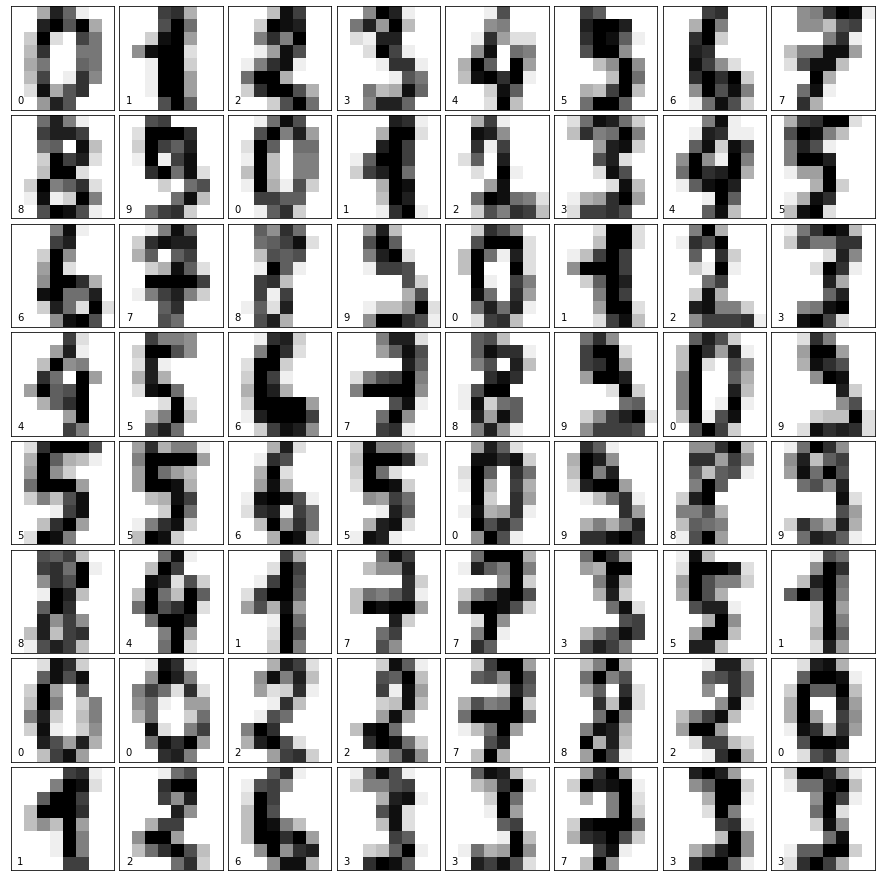

In [8]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='none')
    ax.text(0, 7, str(digits.target[i]))

Now a 2D representation built using PCA, then do a simple classification.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)

Plot a projection on the 2 first principal axis.

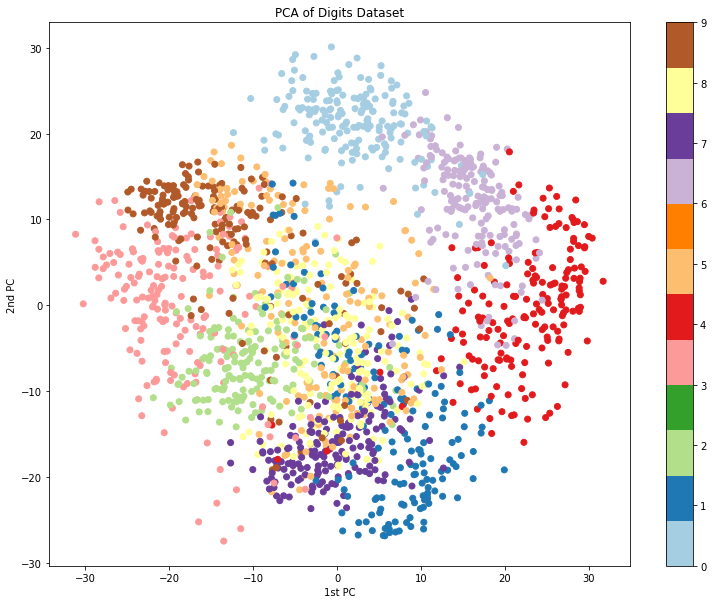

In [18]:
plt.figure(figsize=(13,10))
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.title('PCA of Digits Dataset')
plt.colorbar()

This dimensional reduction is not really clear as many of clusters (marked by different colors) are overlapping.

---

Classification using Gaussian naive Bayes.

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

Split the data into training and validation sets first:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

Train the model on the training data:

In [21]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

Use the model to predict the labels of the test data:

In [22]:
predicted = clf.predict(X_test)
expected = y_test

In [24]:
predicted

array([6, 3, 7, 6, 1, 1, 0, 9, 1, 6, 4, 1, 0, 1, 2, 0, 0, 4, 5, 1, 7, 0,
       8, 4, 2, 7, 8, 7, 6, 3, 0, 2, 3, 3, 4, 1, 2, 5, 4, 9, 4, 6, 3, 6,
       4, 8, 7, 6, 0, 2, 8, 0, 6, 5, 7, 1, 3, 0, 7, 9, 5, 0, 7, 0, 3, 6,
       1, 4, 4, 3, 7, 1, 7, 1, 8, 5, 1, 1, 7, 5, 5, 5, 8, 4, 1, 5, 6, 6,
       1, 8, 0, 4, 7, 7, 1, 2, 7, 9, 9, 4, 3, 9, 2, 3, 3, 1, 2, 6, 8, 5,
       1, 4, 5, 0, 6, 0, 1, 8, 4, 1, 9, 2, 6, 4, 6, 4, 0, 9, 9, 6, 7, 6,
       4, 3, 4, 5, 4, 9, 3, 2, 8, 4, 1, 7, 1, 7, 5, 4, 5, 6, 1, 4, 7, 8,
       5, 8, 8, 3, 3, 0, 1, 7, 3, 6, 0, 6, 7, 5, 4, 3, 7, 0, 0, 3, 9, 7,
       4, 0, 6, 0, 7, 0, 5, 5, 5, 4, 3, 0, 6, 9, 9, 8, 6, 6, 8, 1, 2, 2,
       7, 1, 1, 9, 1, 8, 3, 3, 6, 2, 6, 6, 7, 6, 8, 5, 3, 6, 7, 4, 0, 1,
       1, 6, 1, 6, 3, 8, 1, 9, 8, 6, 3, 9, 7, 0, 6, 2, 9, 1, 1, 7, 1, 7,
       9, 6, 3, 7, 4, 6, 7, 5, 8, 0, 1, 4, 9, 2, 1, 0, 8, 3, 2, 2, 5, 4,
       7, 6, 5, 1, 2, 3, 5, 3, 8, 7, 0, 2, 8, 6, 1, 0, 8, 1, 7, 0, 6, 4,
       9, 0, 9, 4, 8, 3, 2, 7, 1, 0, 7, 5, 6, 7, 5,

Plot the prediction:

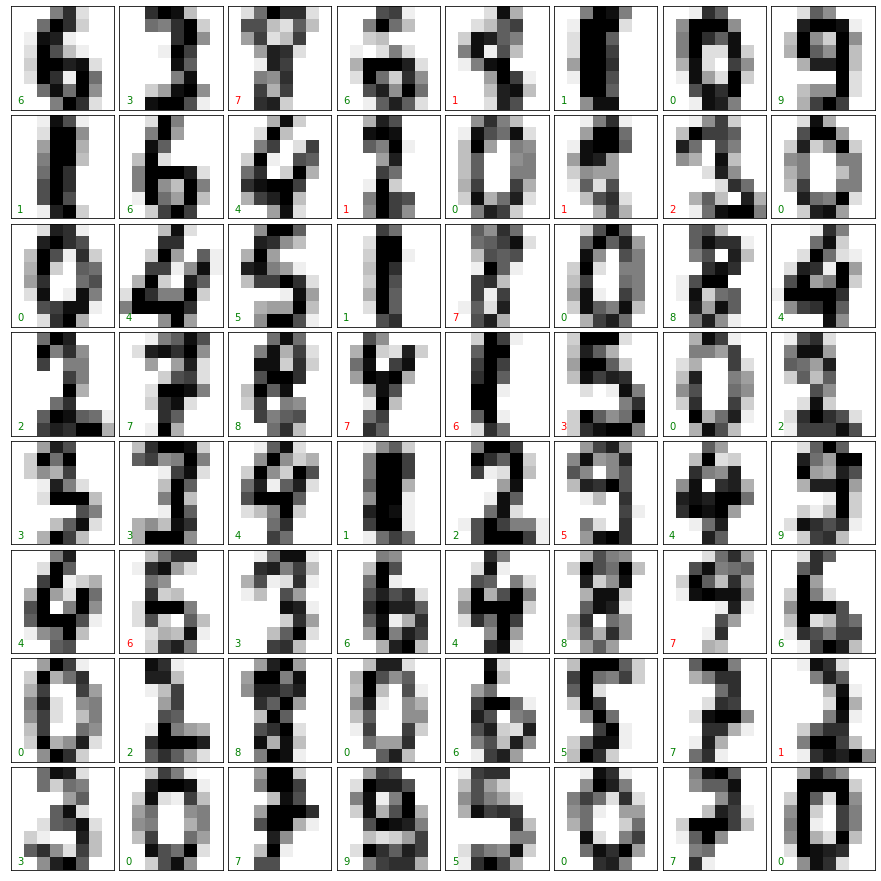

In [25]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='none')

    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

Quantify the performance:

First print the number of correct matches:

In [26]:
matches = (predicted == expected)
print(matches.sum())

368


The total number of data points:

In [27]:
print(len(matches))

450


And now, the ration of correct predictions:

In [28]:
matches.sum() / float(len(matches))

0.8177777777777778

Print the classification report:

In [29]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.79      0.81      0.80        54
           2       0.93      0.58      0.71        45
           3       0.87      0.89      0.88        46
           4       0.90      0.82      0.86        45
           5       0.86      0.86      0.86        36
           6       0.89      0.98      0.93        49
           7       0.58      1.00      0.74        31
           8       0.61      0.75      0.67        40
           9       0.87      0.61      0.72        54

    accuracy                           0.82       450
   macro avg       0.83      0.82      0.81       450
weighted avg       0.84      0.82      0.82       450



Print the confusion matrix:

In [30]:
print(metrics.confusion_matrix(expected, predicted))

[[47  0  0  0  3  0  0  0  0  0]
 [ 0 44  0  0  0  0  2  0  3  5]
 [ 0  5 26  3  0  0  1  0 10  0]
 [ 0  1  1 41  0  1  0  0  2  0]
 [ 0  0  1  0 37  0  2  5  0  0]
 [ 0  0  0  1  0 31  1  2  1  0]
 [ 0  1  0  0  0  0 48  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  5  0  0  0  0  0  5 30  0]
 [ 1  0  0  2  1  4  0 10  3 33]]


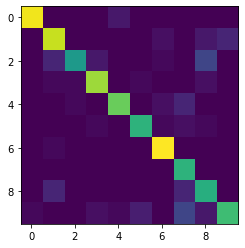

In [31]:
plt.imshow(metrics.confusion_matrix(expected, predicted))

---

Let's look at the iris data:

In [32]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [35]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Fit a PCA:

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

Whitening means that the data is transformed so that the mean is 0 and the covariance is 1.

Project the data in 2D:

In [37]:
X_pca = pca.transform(X)

Visualize the data:

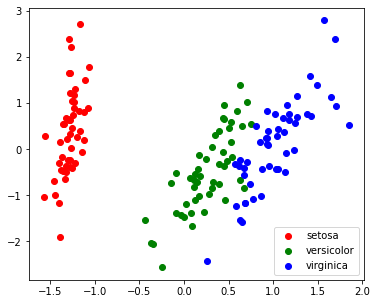

In [38]:
target_ids = range(len(iris.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
plt.legend()
plt.show()

---

tSNE to visualize digits

Let's look how tSNE performs in the visualisation of the digits dataset.

The digits are vectors in a 8*8 = 64 dimensional space. We want to project them in 2D for visualization. tSNE is often a good solution, as it groups and separates data points based on their local relationship.

In [39]:
from sklearn import datasets

digits = datasets.load_digits()

Take the first 500 data points: it's hard to see 1500 points:

In [40]:
X = digits.data[:500]
y = digits.target[:500]

Fit and transform with a TSNE:

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

In [42]:
tsne

TSNE(random_state=0)

Project the data in 2D:

In [43]:
X_2d = tsne.fit_transform(X)

Visualize the data:

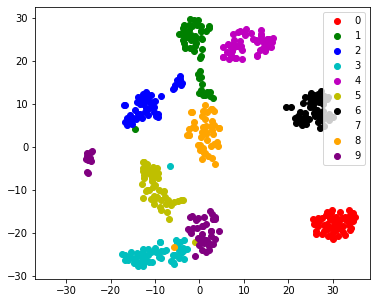

In [44]:
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

---

The eigenfaces example: chaining PCA and SVMs

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction. It starts with a didactic but lengthy way of doing things, and finishes with the idiomatic approach to pipelining in scikit-learn.


Here we’ll take a look at a simple facial recognition example. Ideally, we would use a dataset consisting of a subset of the Labeled Faces in the Wild data that is available with `sklearn.datasets.fetch_lfw_people()`. This is a relatively large download (~200MB).

In [46]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

Let’s visualize these faces to see what we’re working with:

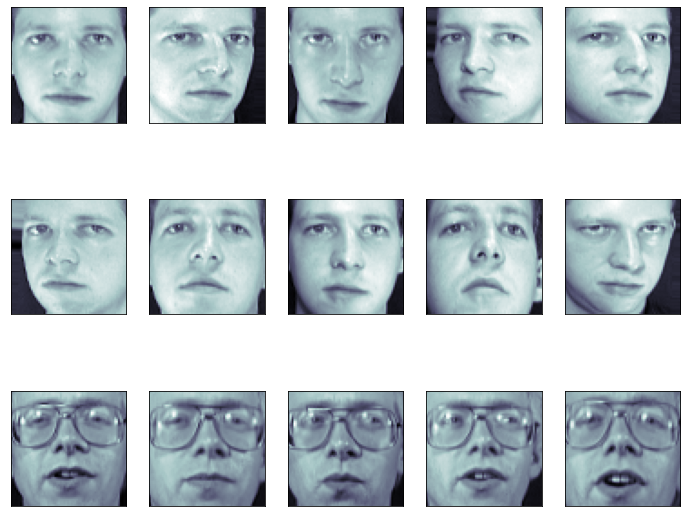

In [48]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12, 10))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

Note is that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial recognition, and is a process that can require a large collection of training data. 

We’ll perform a Support Vector classification of the images. We’ll do a typical train-test split on the images:

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

In [50]:
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset:

In [51]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

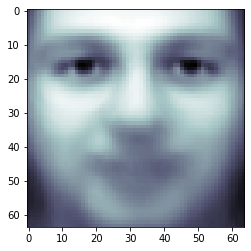

In [52]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

Which is oddly difficult to remember...

![This Man](https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/this-man-hoax.jpg)

It is also interesting to visualize these principal components:

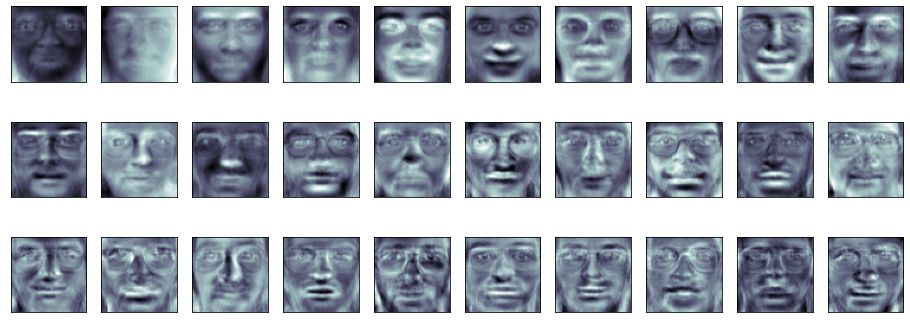

In [53]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:

In [54]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)

(300, 150)


Now we’ll perform support-vector-machine classification on this reduced dataset:

In [55]:
from sklearn import svm

clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

Finally, we can evaluate how well this classification did. First, we might plot a few of the test-cases with the labels learned from the training set:

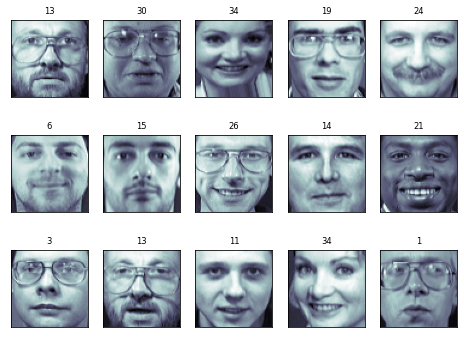

In [57]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape), cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

Again, we can quantify this effectiveness using one of several measures from sklearn.metrics. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [58]:
from sklearn import metrics

y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    